# **Test** **CSV**

In [ ]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Data Exploration

In [ ]:
# Import the 'files' module for file handling in Google Colab.
from google.colab import files

# Upload files using the 'upload()' function, storing them in 'uploaded'.
uploaded = files.upload()

Saving test.csv to test.csv


In [ ]:
import pandas as pd
df_test = pd.read_csv('test.csv')
df_test

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales
0,33574,batticaloa,2686.5,3582,12537
1,10089,batticaloa,1717.56,2576.34,9446.58
2,38329,batticaloa,854.04,1242.24,5201.88
3,11376,batticaloa,1638.12,2320.67,9282.68
4,12410,batticaloa,1039.09,1518.67,5435.24
...,...,...,...,...,...
40744,33698,Wattala,3916.48,4161.26,3916.48
40745,4185,Wattala,3191.92,3004.16,3098.04
40746,28664,Wattala,3838.6,3951.5,Three Thousand seven hundread ruppees
40747,11874,Wattala,4313.76,4183.04,4313.76


In [ ]:
df_test.head()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales
0,33574,batticaloa,2686.5,3582,12537
1,10089,batticaloa,1717.56,2576.34,9446.58
2,38329,batticaloa,854.04,1242.24,5201.88
3,11376,batticaloa,1638.12,2320.67,9282.68
4,12410,batticaloa,1039.09,1518.67,5435.24


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40749 entries, 0 to 40748
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Customer_ID   40749 non-null  int64 
 1   outlet_city   40749 non-null  object
 2   luxury_sales  40749 non-null  object
 3   fresh_sales   40749 non-null  object
 4   dry_sales     40749 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.6+ MB


In [ ]:
print("df_test shape:", df_test.shape)

df_test shape: (40749, 5)


In [ ]:
#Summary Statistics
print("\nSummary Statistics for Test DataFrame:")
display(df_test.describe(include='all'))


Summary Statistics for Test DataFrame:


,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales
count,40749.000000,40749,40749,40749,40749
unique,NaN,27,33183,36100,35771
top,NaN,Jaffna,1801.8,6606.87,1327.2
freq,NaN,2226,7,5,5
mean,20375.000000,NaN,NaN,NaN,NaN
std,11763.367396,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN
25%,10188.000000,NaN,NaN,NaN,NaN
50%,20375.000000,NaN,NaN,NaN,NaN
75%,30562.000000,NaN,NaN,NaN,NaN


Note: descriptive statistics for all columns, including both numerical and categorical ones.

In [ ]:
unique_values_test = df_test.apply(pd.Series.unique)
print(unique_values_test)

Customer_ID     [33574, 10089, 38329, 11376, 12410, 826, 10364...
outlet_city     [batticaloa, Batticaloa, Colombo, Dehiwala-Mou...
luxury_sales    [2686.5, 1717.56, 854.04, 1638.12, 1039.09, 12...
fresh_sales     [3582, 2576.34, 1242.24, 2320.67, 1518.67, 149...
dry_sales       [12537, 9446.58, 5201.88, 9282.68, 5435.24, 68...
dtype: object


In [ ]:
# Missing Value Analysis
print("\nMissing Values in Test DataFrame:")
print(df_test.isnull().sum())  # Changed test_df to df_test
print("\nPercentage of Missing Values in Test DataFrame:")
print(df_test.isnull().sum() / len(df_test) * 100)  # Changed test_df to df_test


Missing Values in Test DataFrame:
Customer_ID     0
outlet_city     0
luxury_sales    0
fresh_sales     0
dry_sales       0
dtype: int64

Percentage of Missing Values in Test DataFrame:
Customer_ID     0.0
outlet_city     0.0
luxury_sales    0.0
fresh_sales     0.0
dry_sales       0.0
dtype: float64


In [ ]:
# change the object data types to float for sales features
# Convert the columns to string type first if they are not
df_test['fresh_sales'] = df_test['fresh_sales'].astype(str)
df_test['luxury_sales'] = df_test['luxury_sales'].astype(str)
df_test['dry_sales'] = df_test['dry_sales'].astype(str)

# Now apply the string replacement and conversion to numeric
df_test['fresh_sales'] = pd.to_numeric(df_test['fresh_sales'].str.replace(',', '',regex=True), errors='coerce')
df_test['luxury_sales'] = pd.to_numeric(df_test['luxury_sales'].str.replace(',', '',regex=True), errors='coerce')
df_test['dry_sales'] = pd.to_numeric(df_test['dry_sales'].str.replace(',', '',regex=True), errors='coerce')

# EDA

**EDA on Uncleaned Test Dataset**

Heatmap to identify missing values

<Axes: >

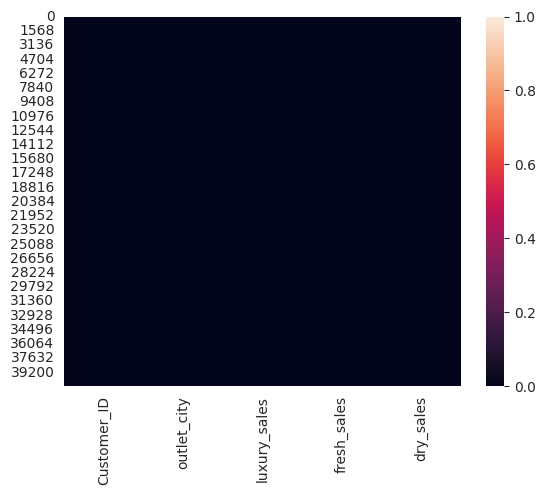

In [ ]:
cols = df_test.columns
sns.heatmap(df_test[cols].isnull())

In [ ]:
luxury_sales_fig = px.box(df_test, x='luxury_sales')
luxury_sales_fig.show()

In [ ]:
fresh_sales_fig = px.box(df_test, x='fresh_sales')
fresh_sales_fig.show()

In [ ]:
dry_sales_fig = px.box(df_test, x='dry_sales')
dry_sales_fig.show()

In [ ]:
#Correlation Analysis
corr_matrix = df_test[['luxury_sales', 'fresh_sales', 'dry_sales']].corr()
# Replace 'coolwarm' with 'Viridis' or px.colors.sequential.Viridis or define a custom list:
fig = px.imshow(corr_matrix, text_auto=True, color_continuous_scale=px.colors.sequential.Viridis, # Change made here
                title="Correlation Heatmap")
fig.show()

In [ ]:
#Sales by City
city_sales = df_test.groupby('outlet_city')[['luxury_sales', 'fresh_sales', 'dry_sales']].sum().reset_index()
fig = px.bar(city_sales, x='outlet_city', y=['luxury_sales', 'fresh_sales', 'dry_sales'],
             title="Sales by City", barmode='group')
fig.show()

# Data Cleaning

In [ ]:
# Checking the datatypes
df_test.dtypes

,0
Customer_ID,int64
outlet_city,object
luxury_sales,float64
fresh_sales,float64
dry_sales,float64


In [ ]:
# Check for number of missing values in each coulmn
df_test.isnull().sum()

,0
Customer_ID,0
outlet_city,0
luxury_sales,2
fresh_sales,1
dry_sales,1


In [ ]:
# Total number of rows with at least one missing value
total_rows_with_missing_values = df_test.isnull().any(axis=1).sum()
print(f"Total number of rows with missing values: {total_rows_with_missing_values}")


Total number of rows with missing values: 4


In [ ]:
# display the rows with null values
df_test[df_test.isnull().any(axis=1)]

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales
6,10364,batticaloa,NaN,914.40,3352.80
6299,4059,Anuradhapura,NaN,1548.69,5705.70
13949,28662,Jaffna,2195.84,NaN,1509.64
40746,28664,Wattala,3838.60,3951.50,NaN


In [ ]:
# show the raw data rows with these customer Ids
test_check = pd.read_csv('test.csv')
selected_rows = pd.DataFrame()

for customer_id in [10364, 4059, 28662, 28664]:
    row = test_check.loc[test_check['Customer_ID'] == customer_id]
    selected_rows = pd.concat([selected_rows, row])

selected_rows

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales
6,10364,batticaloa,Seven Hundread and sixty Ruppees,914.4,3352.8
6299,4059,Anuradhapura,Eight Hundread and fifteen ruppes,1548.69,5705.7
13949,28662,Jaffna,2195.84,Nine thousand ruppess,1509.64
40746,28664,Wattala,3838.6,3951.5,Three Thousand seven hundread ruppees


In [ ]:
updates = {
    10364: {'luxury_sales': 760},
    4059: {'luxury_sales': 815},
    28662: {'fresh_sales': 9000},
    28664: {'dry_sales': 3700}
}

for customer_id, updates_dict in updates.items():
    for column, value in updates_dict.items():
        df_test.loc[df_test['Customer_ID'] == customer_id, column] = value

In [ ]:
# Total number of rows with missing values
df_test.isnull().any(axis=1).sum()

0

In [ ]:
# change the customer ID feature to string datatype
df_test['Customer_ID'] = df_test['Customer_ID'].astype(str)
# Check data types
df_test.dtypes

,0
Customer_ID,object
outlet_city,object
luxury_sales,float64
fresh_sales,float64
dry_sales,float64


In [ ]:
# check the unique values in the outlet city fearture
df_test.outlet_city.unique()

array(['batticaloa', 'Batticaloa', 'Colombo', 'Dehiwala-Mount Lavinia',
       'Anuradhapura', 'Galle', 'Gampaha', 'Homagama', 'Jaffna',
       'Kaduwela', 'Kalmunai', 'kalmunai', 'Kandy', 'Katunayake',
       'Kelaniya', 'Madawachiya', 'Kotte', 'Moratuwa', 'MoraTuwa',
       'Negombo', 'Nuwara Eliya', 'Panadura', 'Peliyagoda', 'PeliyagodA',
       'Trincomale', 'Trincomalee', 'Wattala'], dtype=object)

In [ ]:
df_test.outlet_city.nunique()

27

In [ ]:
# Correcting the misspellings in df_test
misspellings = {
    'batticaloa': 'Batticaloa',
    'kalmunai': 'Kalmunai',
    'MoraTuwa': 'Moratuwa',
    'PeliyagodA': 'Peliyagoda',
    'Trincomale': 'Trincomalee'
}

df_test['outlet_city'] = df_test['outlet_city'].replace(misspellings)

In [ ]:
# check the unique values in the outlet city fearture
df_test.outlet_city.unique()

array(['Batticaloa', 'Colombo', 'Dehiwala-Mount Lavinia', 'Anuradhapura',
       'Galle', 'Gampaha', 'Homagama', 'Jaffna', 'Kaduwela', 'Kalmunai',
       'Kandy', 'Katunayake', 'Kelaniya', 'Madawachiya', 'Kotte',
       'Moratuwa', 'Negombo', 'Nuwara Eliya', 'Panadura', 'Peliyagoda',
       'Trincomalee', 'Wattala'], dtype=object)

In [ ]:
test=df_test[(df_test['outlet_city']=='Anuradhapura') | (df_test['outlet_city']=='Madawachiya')]
test

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales
6192,10321,Anuradhapura,1708.80,3246.72,11107.20
6193,16217,Anuradhapura,1810.50,3077.85,12673.50
6194,22360,Anuradhapura,1228.78,1755.40,5880.59
6195,11471,Anuradhapura,1642.55,2021.60,8339.10
6196,6151,Anuradhapura,1119.16,1358.98,5515.86
...,...,...,...,...,...
26509,18853,Madawachiya,1629.42,8272.44,2130.78
26510,34070,Madawachiya,975.45,4226.95,1170.54
26511,26102,Madawachiya,741.73,4585.24,1348.60
26512,36534,Madawachiya,1417.32,7913.37,2125.98


In [ ]:
test.shape

(3144, 5)

**EDA on cleaned test dataset**

<Axes: >

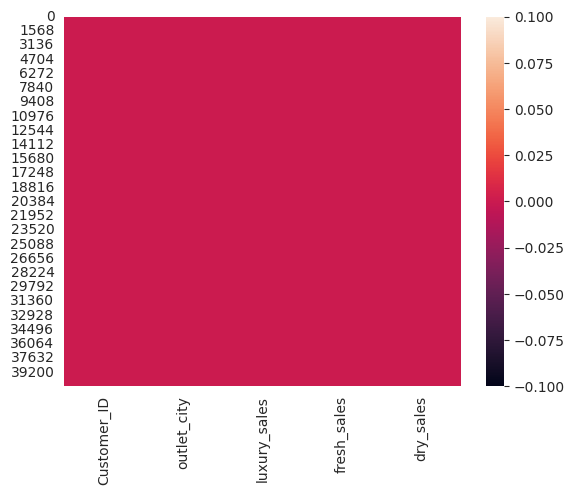

In [ ]:
cols = df_test.columns
sns.heatmap(df_test[cols].isnull())

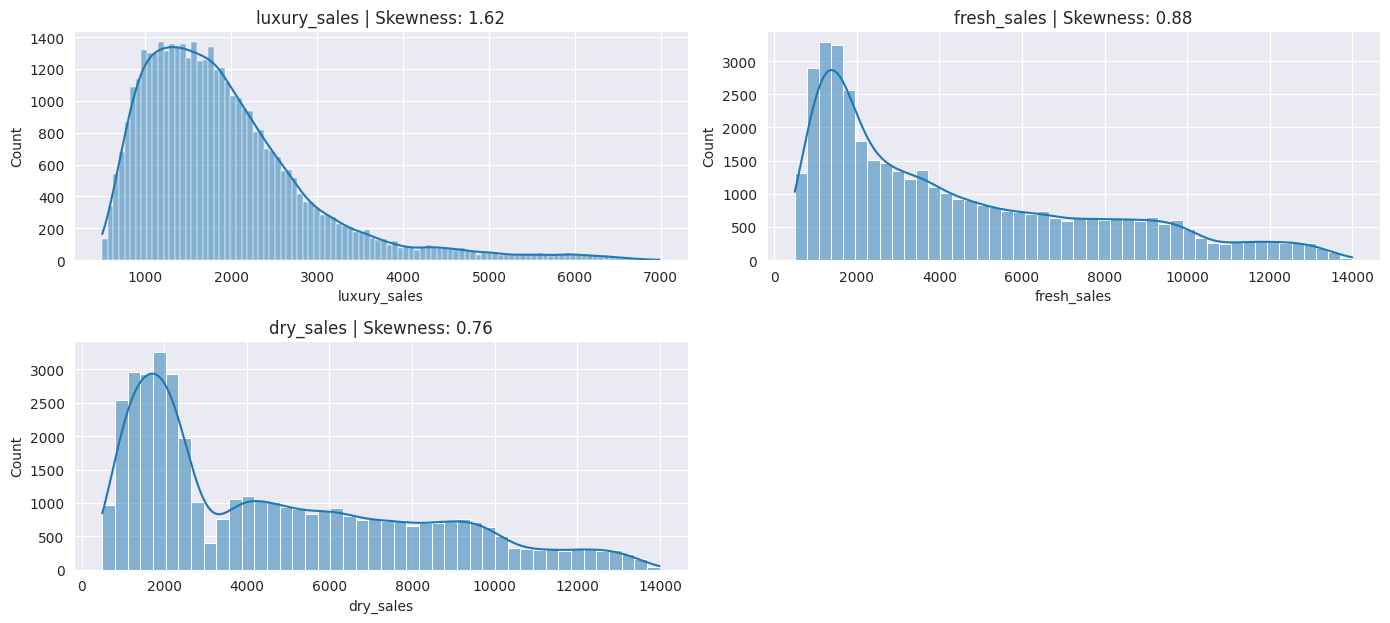

In [ ]:
#define numerical columns
numerical_columns = ['luxury_sales', 'fresh_sales', 'dry_sales']
sns.set_style("darkgrid")

#create figure with dynamic height
plt.figure(figsize=(14, len(numerical_columns) * 3))

#loop through numerical columns and plot histograms
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df_test[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df_test[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

In [ ]:
#violin plot
fig = px.violin(df_test, x="outlet_city", y="luxury_sales", box=True, points="all",
                title="Distribution of Luxury Sales Across different outlets")
fig.update_layout(xaxis_title="Cluster Category", yaxis_title="Luxury Sales")
fig.show()

In [ ]:
#Sales by City
city_sales = df_test.groupby('outlet_city')[['luxury_sales', 'fresh_sales', 'dry_sales']].sum().reset_index()
fig = px.bar(city_sales, x='outlet_city', y=['luxury_sales', 'fresh_sales', 'dry_sales'],
             title="Sales by City", barmode='group')
fig.show()